# 1. Libraries Implemented

In [1]:
## Classification Algorithms

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

import pandas as pd
import numpy as np

# importing ploting libraries
import matplotlib.pyplot as plt   
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns


# Libraries for constructing Pipelines
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

# Library for Normalization of Numerical Data
from scipy.stats import zscore

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# 2. Data Collection

## 2.1 Data Source

The Data Source for the current project is taken from the **Kaggle** repository with the following [Link](https://www.kaggle.com/uciml/german-credit)

The original Dataset was missing the **default** column. I have added the column from the original UCI Repository.
Please refer the below link for further reference:

[Missing Credit Label](https://www.kaggle.com/uciml/german-credit/discussion/26658#latest-275345)

## 2.2 Data Loading

    A Test Repository is created in GitHub that contains the Dataset for the analysis.

In [2]:
url = 'https://raw.githubusercontent.com/S-B-Iqbal/Test/master/german_credit_data.csv'

In [3]:
credit = pd.read_csv(url, header = 0, names = ['Index', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'default'])

In [4]:
credit.head()

,Index,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,default
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,no
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,yes
2,2,49,male,1,own,little,NaN,2096,12,education,no
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,no
4,4,53,male,2,free,little,little,4870,24,car,yes


## 2.3 Data Cleansing

In [5]:
credit['default'].value_counts()

no     700
yes    300
Name: default, dtype: int64

In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Index               1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
default             1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.0+ KB


### 2.3.1 Removal of NAN's

In [7]:
# Removing NaN's from 'Saving accounts' and 'Checking account' column

In [4]:
credit['Saving accounts'] = credit['Saving accounts'].fillna(value = 'NA')

In [5]:
print(credit['Saving accounts'].value_counts())

little        603
NA            183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64


In [6]:
credit['Checking account'] = credit['Checking account'].fillna(value = 'NA')

In [7]:
credit['Checking account'].value_counts()

NA          394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

# 3. Exploratory Data Analysis

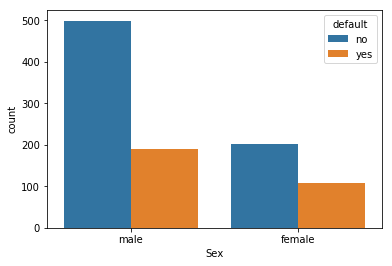

In [12]:
sns.countplot(x= 'Sex', data = credit, hue= 'default')

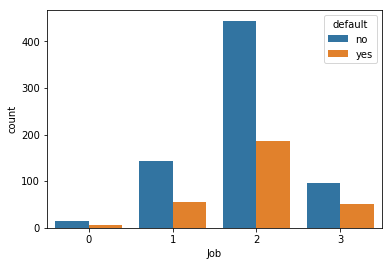

In [13]:
sns.countplot(x= 'Job', data = credit, hue= 'default')

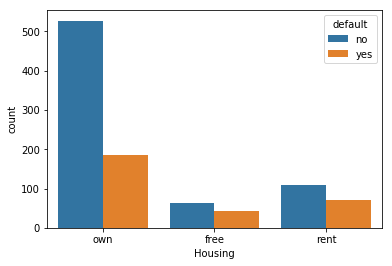

In [14]:
sns.countplot(x= 'Housing', data = credit, hue= 'default')

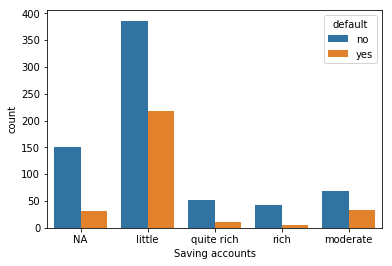

In [15]:
sns.countplot(x= 'Saving accounts', data = credit, hue= 'default')

 - With respect to **'Savings Account'** we can visually observe that people with 'little or 'moderate' income are likely to default more.
 - Let's quantify our observations

####  Proportion of Savings Account with little or moderate income and their default level

In [215]:
print("\nLittle Income :\n",credit[credit['Saving accounts'] == 'little']['default'].value_counts().to_frame())
print("\nModerate Income\n", credit[credit['Saving accounts'] == 'moderate']['default'].value_counts().to_frame())


Little Income :
      default
no       386
yes      217

Moderate Income
      default
no        69
yes       34


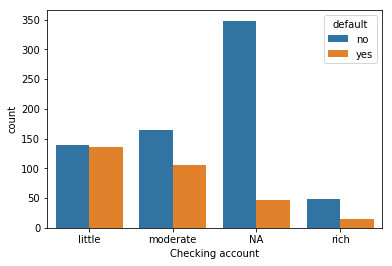

In [17]:
sns.countplot(x= 'Checking account', data = credit, hue= 'default')

 - So, People with little or moderate income are proportionally likely to default more.
 - Lets analyze the level at which each type of Checking account affects the Proportionality of Default.

#### Proportion of Chechings Account with little or moderate income and their default level

In [216]:
print("\nLittle Income :\n",credit[credit['Checking account'] == 'little']['default'].value_counts().to_frame())
print("\nModerate Income :\n",credit[credit['Checking account'] == 'moderate']['default'].value_counts().to_frame())


Little Income :
      default
no       139
yes      135

Moderate Income :
      default
no       164
yes      105


# 4. Feature Engineering

 - Based on the inference of 'Savings Account' and 'Checking Account' we can club the columns into 3 categories :
     - 'Little'
     - 'Moderate'
     - 'Other'

In [8]:
# 'Saving Account'

credit['Saving accounts']= credit['Saving accounts'].map({'little': 'little', 'moderate': 'moderate', 'quite rich':'other','rich':'other', 'NA':'other' })

In [9]:
# 'Checking Account'
credit['Checking account']= credit['Checking account'].map({'little': 'little', 'moderate': 'moderate','rich':'other', 'NA':'other' })

In [10]:
## LabeEncoding the Purpose column
le = LabelEncoder()
credit['Purpose'] = le.fit_transform(credit['Purpose'])

In [11]:
print("The various purposes are: ", le.classes_.tolist(), "\nAnd the hot encoded numbers for the same are", credit['Purpose'].unique().tolist())

The various purposes are:  ['business', 'car', 'domestic appliances', 'education', 'furniture/equipment', 'radio/TV', 'repairs', 'vacation/others'] 
And the hot encoded numbers for the same are [5, 3, 4, 1, 0, 2, 6, 7]


# 5. Data Processing

## 5.1 Data Preparation

### 5.1.1 Assigning 'Dependent' and 'Independent' Features

In [12]:
credit['default'] = credit['default'].map({'no':0, 'yes': 1})

In [16]:
credit['default'].value_counts()

0    700
1    300
Name: default, dtype: int64

# Upsampling Minority

In [18]:
from sklearn.utils import resample

In [17]:
credit_majority = credit[credit.default == 0]
credit_minority = credit[credit.default == 1]

In [23]:
credit_minority_upsampled = resample(credit_minority, replace = True, n_samples =  600, random_state = 666)

## Combine classes

credit_upscaled = pd.concat([credit_majority, credit_minority_upsampled])

In [24]:
credit_upscaled.default.value_counts()

0    700
1    600
Name: default, dtype: int64

In [25]:
x= credit_upscaled[['Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose']]
y = credit_upscaled['default']

In [26]:
# Creating a copy to avoid corruption of Data.
x1 = x.copy()

### 5.1.2 Data Stadardization: Dummification of Categorical Columns and Normalization of Numerical Columns

In [27]:
# List to store Categorical Columns
cat_cols = list(x1.columns[x1.dtypes == 'object'])
print("Categorical Columns: ",cat_cols)

# List to store Numerical Columns
num_cols = list(x1.columns[x1.dtypes != 'object'])
print("\nNumerical Columns:" ,num_cols)

## One-Hot Encoding Categorical Columns
x1_dummy =  pd.get_dummies(x1[cat_cols], drop_first=True)

## Joining New dummified and Numerical columns
x_new = pd.concat([x1_dummy, x1[num_cols]], axis=1, join='inner')

#### Normalizing the Dataset
ss = StandardScaler()

x_normal = ss.fit_transform(x_new)

Categorical Columns:  ['Sex', 'Housing', 'Saving accounts', 'Checking account']

Numerical Columns: ['Age', 'Job', 'Credit amount', 'Duration', 'Purpose']


### 5.1.3 Dividing the Data into 'Train', 'Validation' and 'Test' Sets.

In [28]:
SEED = 666

In [29]:
x_int, x_test, y_int, y_test = train_test_split(x_normal, y, test_size=100, stratify=y, random_state = SEED)

In [30]:
x_train,x_val,y_train,y_val = train_test_split(x_int, y_int, test_size=100, stratify = y_int, random_state = SEED)

In [31]:
# print proportions
print('train: {}% | Validation: {}% | Test: {}%'.format( round(len(y_train)/len(y),2), 
                                                        round(len(y_val)/len(y) ,2), 
                                                        round(len(y_test)/len(y),2) ) )

train: 0.85% | Validation: 0.08% | Test: 0.08%


## 5.2 Model Comparison

   An Analytical comparison is performed initially, to assess which Models fare well in making accurate predictions. In doing so, several classification Techniques are compared. The model should perform better than a base model i.e., the one with 70% and above accuracy. Also, recall should be high because from a Business point of view 'False Negative's' i.e., Fraudulent transactions classified as Non-Fraudulent will be more costlier to the Bank.

In [32]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVC', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('Ada', AdaBoostClassifier()))
models.append(('Grad', GradientBoostingClassifier()))

# Model Evaluation

result = []
model_names = []
scoring = ['accuracy', 'recall', 'precision', 'roc_auc']

for model_name, model in models:
    kfold = KFold(n_splits=10, random_state=SEED)
    cv_results1 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[0])
    cv_results2 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[1])
    cv_results3 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[2])
    cv_results4 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[3])
    model_names.append(model_name)
    msg = "%s:\n ACCURACY = %f, RECALL=(%f), PRECISION=(%f), ROC-AUC=(%f)" % (model_name, cv_results1.mean(),cv_results2.mean(), cv_results3.mean(), cv_results4.mean())
    print(msg)

    

LR:
 ACCURACY = 0.716364, RECALL=(0.721222), PRECISION=(0.688507), ROC-AUC=(0.782089)
KNN:
 ACCURACY = 0.731818, RECALL=(0.720727), PRECISION=(0.704737), ROC-AUC=(0.803654)
SGD:
 ACCURACY = 0.624545, RECALL=(0.556134), PRECISION=(0.602804), ROC-AUC=(0.693337)
DT:
 ACCURACY = 0.810000, RECALL=(0.874667), PRECISION=(0.769671), ROC-AUC=(0.817467)
SVC:
 ACCURACY = 0.755455, RECALL=(0.781325), PRECISION=(0.716727), ROC-AUC=(0.826979)
RF:
 ACCURACY = 0.856364, RECALL=(0.867334), PRECISION=(0.827709), ROC-AUC=(0.923496)
Ada:
 ACCURACY = 0.744545, RECALL=(0.741708), PRECISION=(0.719973), ROC-AUC=(0.807910)
Grad:
 ACCURACY = 0.789091, RECALL=(0.803904), PRECISION=(0.758013), ROC-AUC=(0.857076)


## 5.3 Model Selection: Logistic Regression

The reasons for choosing 'Logistic Regression' over other Techniques is as below:
    - Simplicity.
    - Explainability.
    - Accuracy, Recall and ROC-AUC is comparable to Ensemble Methods.

In [105]:
lr = LogisticRegression()

model = lr.fit(x_train, y_train)

model.score(x_val, y_val)

0.73

In [128]:
# Fitting the model using the intermediate dataset.
model2 = lr.fit(x_int, y_int)

model2.score(x_test, y_test)

0.69

In [145]:
# Predcited probability of each class.
y_pred_prob = model2.predict_proba(x_test)

# Predicted value of each class
y_pred = model2.predict(x_test)

In [146]:
cMatrix = confusion_matrix(y_test, y_pred)
print(cMatrix)
print("Transactions which were falsely classified as FRAUD =  %.1f Percent" %(cMatrix[0][1]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were falsely classified as NOT-FRAUD = %.1f Percent"%(cMatrix[1][0]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were truly classified as FRAUD = %.1f Percent"% (cMatrix[1][1]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were truly classified as NOT-FRAUD = %.1f Percent"% (cMatrix[0][0]/ sum(sum(cMatrix))*100 ))

[[64  6]
 [25  5]]
Transactions which were falsely classified as FRAUD =  6.0 Percent
Transactions which were falsely classified as NOT-FRAUD = 25.0 Percent
Transactions which were truly classified as FRAUD = 5.0 Percent
Transactions which were truly classified as NOT-FRAUD = 64.0 Percent


## 5.4 Model Optimization

Models with the regularization of type 'l1' and 'l2' are Optimized using Grid-SearchCV.Several Hyper-parameters were taken into consideration. It is to be observed:
   * Model for type L1 performs better than L2.
   * False Classification Rate for the model in section 5.4.1 is lesser than the one in 5.4.2. Hence, We will use it as our Base model.

### 5.4.1 'l1' Regularization

In [149]:
LRPipeline1 = Pipeline([( 'LogReg', LogisticRegression(random_state=SEED)) ])

params = dict({ 'LogReg__penalty': ['l1'],'LogReg__C': [0.001,0.01,0.1,0.5,0.9,1,3,5,10], 'LogReg__tol': [ 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2 ], 'LogReg__solver': ['liblinear','saga']})

GSLR1 = GridSearchCV(LRPipeline1, params, cv=10, scoring='accuracy')

In [150]:
GSLR1.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('LogReg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=666, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'LogReg__penalty': ['l1'], 'LogReg__C': [0.001, 0.01, 0.1, 0.5, 0.9, 1, 3, 5, 10], 'LogReg__tol': [0.0001, 0.001, 0.01, 0.1, 1, 100.0], 'LogReg__solver': ['liblinear', 'saga']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [151]:
GSLR1.score(x_val, y_val)

0.72

In [152]:
# Fetching the best parameters for Model building
GSLR1.best_params_

{'LogReg__C': 3,
 'LogReg__penalty': 'l1',
 'LogReg__solver': 'liblinear',
 'LogReg__tol': 0.1}

In [162]:
# Fitting the model using the intermediate dataset.
GSLR1.fit(x_int,y_int)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('LogReg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=666, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'LogReg__penalty': ['l1'], 'LogReg__C': [0.001, 0.01, 0.1, 0.5, 0.9, 1, 3, 5, 10], 'LogReg__tol': [0.0001, 0.001, 0.01, 0.1, 1, 100.0], 'LogReg__solver': ['liblinear', 'saga']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [163]:
# Model Accuracy on the Test Set

GSLR1.score(x_test, y_test)

0.69

In [166]:
# Predcited probability of each class.
y_pred_prob1 = GSLR1.predict_proba(x_test)

# Predicted value of each class
y_pred1 = GSLR1.predict(x_test)

In [167]:
cMatrix1 = confusion_matrix(y_test, y_pred1)
print(cMatrix1)
print("Transactions which were falsely classified as FRAUD =  %.1f Percent" %(cMatrix1[0][1]/ sum(sum(cMatrix1))*100 ) )
print("Transactions which were falsely classified as NOT-FRAUD = %.1f Percent"%(cMatrix1[1][0]/ sum(sum(cMatrix1))*100 ) )
print("Transactions which were truly classified as FRAUD = %.1f Percent"% (cMatrix1[1][1]/ sum(sum(cMatrix1))*100 ) )
print("Transactions which were truly classified as NOT-FRAUD = %.1f Percent"% (cMatrix1[0][0]/ sum(sum(cMatrix1))*100 ))

[[64  6]
 [25  5]]
Transactions which were falsely classified as FRAUD =  6.0 Percent
Transactions which were falsely classified as NOT-FRAUD = 25.0 Percent
Transactions which were truly classified as FRAUD = 5.0 Percent
Transactions which were truly classified as NOT-FRAUD = 64.0 Percent


### 5.4.2 'l2' Regularization

In [170]:
LRPipeline2 = Pipeline([( 'LogReg', LogisticRegression(random_state=SEED)) ])

params = dict({'LogReg__max_iter':[100,200,300,400,500] ,'LogReg__penalty': ['l2'],'LogReg__C': [0.01,0.1,0.5,0.9,1,5,10], 'LogReg__tol': [ 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2 ], 'LogReg__solver': ['newton-cg','sag','lbfgs']})

GSLR2 = GridSearchCV(LRPipeline2, params, cv=10, scoring='accuracy')

In [171]:
GSLR2.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('LogReg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=666, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'LogReg__max_iter': [100, 200, 300, 400, 500], 'LogReg__penalty': ['l2'], 'LogReg__C': [0.01, 0.1, 0.5, 0.9, 1, 5, 10], 'LogReg__tol': [0.0001, 0.001, 0.01, 0.1, 1, 100.0], 'LogReg__solver': ['newton-cg', 'sag', 'lbfgs']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [172]:
# Fetching the best parameters for Model building
GSLR2.best_params_

{'LogReg__C': 5,
 'LogReg__max_iter': 100,
 'LogReg__penalty': 'l2',
 'LogReg__solver': 'sag',
 'LogReg__tol': 0.01}

In [173]:
# Fitting the model using the intermediate dataset.
GSLR2.fit(x_int,y_int)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('LogReg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=666, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'LogReg__max_iter': [100, 200, 300, 400, 500], 'LogReg__penalty': ['l2'], 'LogReg__C': [0.01, 0.1, 0.5, 0.9, 1, 5, 10], 'LogReg__tol': [0.0001, 0.001, 0.01, 0.1, 1, 100.0], 'LogReg__solver': ['newton-cg', 'sag', 'lbfgs']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [174]:
# Model Accuracy on the Test Set

GSLR2.score(x_test, y_test)

0.68

In [187]:
# Predcited probability of each class.
y_pred_prob2 = GSLR2.predict_proba(x_test)

# Predicted value of each class
y_pred2 = GSLR2.predict(x_test)

In [176]:
cMatrix2 = confusion_matrix(y_test, y_pred2)
print(cMatrix2)
print("Transactions which were falsely classified as FRAUD =  %.1f Percent" %(cMatrix2[0][1]/ sum(sum(cMatrix2))*100 ) )
print("Transactions which were falsely classified as NOT-FRAUD = %.1f Percent"%(cMatrix2[1][0]/ sum(sum(cMatrix2))*100 ) )
print("Transactions which were truly classified as FRAUD = %.1f Percent"% (cMatrix2[1][1]/ sum(sum(cMatrix2))*100 ) )
print("Transactions which were truly classified as NOT-FRAUD = %.1f Percent"% (cMatrix2[0][0]/ sum(sum(cMatrix2))*100 ))

[[64  6]
 [26  4]]
Transactions which were falsely classified as FRAUD =  6.0 Percent
Transactions which were falsely classified as NOT-FRAUD = 26.0 Percent
Transactions which were truly classified as FRAUD = 4.0 Percent
Transactions which were truly classified as NOT-FRAUD = 64.0 Percent


## 5.5 Model Evaluation

We shall proceed with the model selected in section 5.4.1. The goal is to reduce the **FALSE NEGATIVE** count i.e., Fraudulent Transactions that are classified as Non-Fraudulent. This is so because classifying a Fraud transaction as Non-Fraud will be more cost inducuve to the Bank than classifying a Non-Fraud Transaction as Fraud.    
In order to do so, we tweak the predicted probability of the test data and assign higher weightage to 

In [179]:
# Vaues taken from section 5.4.1
finalModel = LogisticRegression(penalty='l1', solver='liblinear', tol=0.1, C=5)

In [180]:
finalModel.fit(x_int, y_int)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.1, verbose=0, warm_start=False)

In [186]:
scoreTrain = finalModel.score(x_val, y_val)
scoreTest = finalModel.score(x_test,y_test)

print("The Accuracy of the model on the Train Set is: %.1f " % (scoreTrain * 100))
print("The Accuracy of the model on the Test Set is: %.1f " % (scoreTest * 100))

The Accuracy of the model on the Train Set is: 72.0 
The Accuracy of the model on the Test Set is: 69.0 


In [206]:
# Predcited probability of each class.
y_pred_prob_final = finalModel.predict_proba(x_test)

# Predicted value of each class
y_pred_final = finalModel.predict(x_test)

# Predicted Probability of class '0' i.e., not a Fraud Transaction.
y_zero = pd.Series(y_pred_prob_final[:,0])

# Mapping the predicted probability higher than 0.689 to class 0 i.e., Not-Fraud class.
y_pred_optimum = y_zero.map(lambda x: 0 if x>0.689 else 1)

cMatrix = confusion_matrix(y_test, y_pred_optimum)
print(cMatrix)
print("Transactions which were falsely classified as FRAUD =  %.1f Percent" %(cMatrix[0][1]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were falsely classified as NOT-FRAUD = %.1f Percent"%(cMatrix[1][0]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were truly classified as FRAUD = %.1f Percent"% (cMatrix[1][1]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were truly classified as NOT-FRAUD = %.1f Percent"% (cMatrix[0][0]/ sum(sum(cMatrix))*100 ))

[[52 18]
 [10 20]]
Transactions which were falsely classified as FRAUD =  18.0 Percent
Transactions which were falsely classified as NOT-FRAUD = 10.0 Percent
Transactions which were truly classified as FRAUD = 20.0 Percent
Transactions which were truly classified as NOT-FRAUD = 52.0 Percent


# 6. Results

|**Model**| **Train Accuracy**| **Test Accuracy**|
|:-------:|:-----------------:|:--------------:|
| Logistic Regression |  72% | 72% |

   * **Test False Negative Rate** : 10%
   * **Test False Positive Rate** : 18%

# 7. Conclusion

* The current model has an accuracy of 72% on unseen data.
* The Model makes a trade-off i.e., in order to reduce False-Negative, the False-Positive prediction rate increases.